# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Exogenous variables](#7)
8. [Splitting training and test data with exogenous variables](#8)
9. [Implementation of StatsForecast with exogenous variables](#9)
10. [Evaluate the model for exogenous variables](#10)
11. [Conclusion](#11)
12. [References](12)

<a id="1"></a> 
# **Introduction**

Time series modeling applied to air quality forecasting is a fundamental tool in the management and control of air pollution. Air quality is a crucial aspect for human health and the environment, and having accurate forecasts is essential to take preventive measures, implement control and mitigation policies, and generate early warnings in case of critical situations.

Time series modeling is based on the analysis and modeling of sequential data based on their chronological order. In the case of air quality, sequential data refers to periodic measurements of different atmospheric pollutants, such as suspended particles (PM), nitrogen dioxide (NO2), ozone (O3), among others. These measurements are obtained from monitoring stations strategically located in different geographic areas.

The primary goal of time series modeling in air quality forecasting is to predict future levels of air pollutants based on historical data and observed patterns. This allows us to anticipate possible pollution events and make informed decisions to reduce negative impacts on health and the environment.

By applying time series modeling techniques, seasonal patterns, trends and repetitive cycles can be identified in air quality data. In addition, relevant external variables can be taken into account, such as weather conditions, which can influence the concentration of contaminants.

Among the most commonly used models for air quality forecasting are the ARIMA (AutoRegressive Integrated Moving Average) models, the complex exponential smoothing model (CES) and neural network models, among others. These models are capable of capturing the temporal and seasonal characteristics of the data and generating accurate forecasts for different time horizons.

In summary, time series modeling applied to air quality forecasting is a powerful tool for predicting future levels of air pollutants. It provides valuable information for decision-making in pollution management and allows the implementation of preventive and corrective measures in a timely manner. With the advancement of modeling techniques and access to increasingly quality data, time series modeling has become an indispensable tool to ensure better air quality and protect health and the environment.

<a id="2"></a>
# **Case study**

In this case study, time series modeling will be applied to predict air quality in the national capital of Delhi, India. Delhi is one of the most populous cities in the world and faces significant challenges in terms of air pollution. The objective is to develop an accurate model that can forecast the levels of air pollutants in Delhi, enabling preventive and control measures to be taken to protect the health of residents and address the problem of air pollution.

Historical air quality data collected at different monitoring stations in Delhi over several years will be used. This data includes periodic measurements of various air pollutants, such as particulate matter (PM2.5 and PM10), nitrogen dioxide (NO2), sulfur dioxide (SO2), ozone (O3), carbon monoxide (CO), among others. . In addition, relevant external variables will be considered, such as meteorological conditions (temperature, humidity, wind speed) that may have an impact on air quality.

Modeling process:

1. Exploratory data analysis
2. Data preparation.
3. Model selection.
4. Model training.
5. Forecast.
6. Model evaluation.

Time series modeling applied to air quality forecasting in Delhi is a valuable tool to address the challenge of air pollution in one of the most populated cities in the world. With proper focus on model selection and consideration of relevant variables, the generated forecasts can contribute to informed decision making and the implementation of effective preventive and control measures. The application of time series modeling in air quality management in Delhi can help improve the health and well-being of residents, as well as protect the environment.

# Importing Libraries

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [8]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#6495ED',  # #212946
    'axes.facecolor': '#6495ED',
    'savefig.facecolor': '#6495ED',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **About Dataset**

This dataset contains air quality data from the national capital of Delhi, India. It includes information on air pollution levels, including particulate matter (PM2.5 and PM10) levels, nitrogen dioxide (NO2), sulfur dioxide (SO2), carbon dioxide (CO2), ozone (O3), and other pollutants. The data was collected from monitoring stations located in various areas of Delhi between November 25, 2020, and January 24, 2023. This dataset is a valuable resource for researchers and policymakers to better understand air quality in Delhi and its impacts on public health.

- date: Date and time
- co: Сoncentration of CO (Carbon monoxide), μg/m3.
- no: Сoncentration of NO (Nitrogen monoxide), μg/m3.
- no2: Сoncentration of NO2 (Nitrogen dioxide), μg/m3.
- o3: Сoncentration of O3 (Ozone), μg/m3.
- so2: Сoncentration of SO2 (Sulphur dioxide), μg/m3.
- pm2_5: Сoncentration of PM2.5 (Fine particles matter), μg/m3
- pm10: Сoncentration of PM10 (Coarse particulate matter), μg/m3.
- nh3: Сoncentration of NH3 (Ammonia), μg/m3.

In [3]:
# Loading the Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/delhi_air_quality_forecast.csv", parse_dates=["date"])
dataset.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In this case we are going to use pm2_5 as the target variable.

In [4]:
dataset["unique_id"]="1"
dataset=dataset.rename(columns={"date": "ds", "pm2_5": "y"})
dataset.head()

,ds,co,no,no2,o3,so2,y,pm10,nh3,unique_id
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,1
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,1
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,1
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         18776 non-null  datetime64[ns]
 1   co         18776 non-null  float64       
 2   no         18776 non-null  float64       
 3   no2        18776 non-null  float64       
 4   o3         18776 non-null  float64       
 5   so2        18776 non-null  float64       
 6   y          18776 non-null  float64       
 7   pm10       18776 non-null  float64       
 8   nh3        18776 non-null  float64       
 9   unique_id  18776 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.4+ MB


<a id="3"></a>
# **Explore Data with the plot method**

In [6]:
df = dataset.copy()

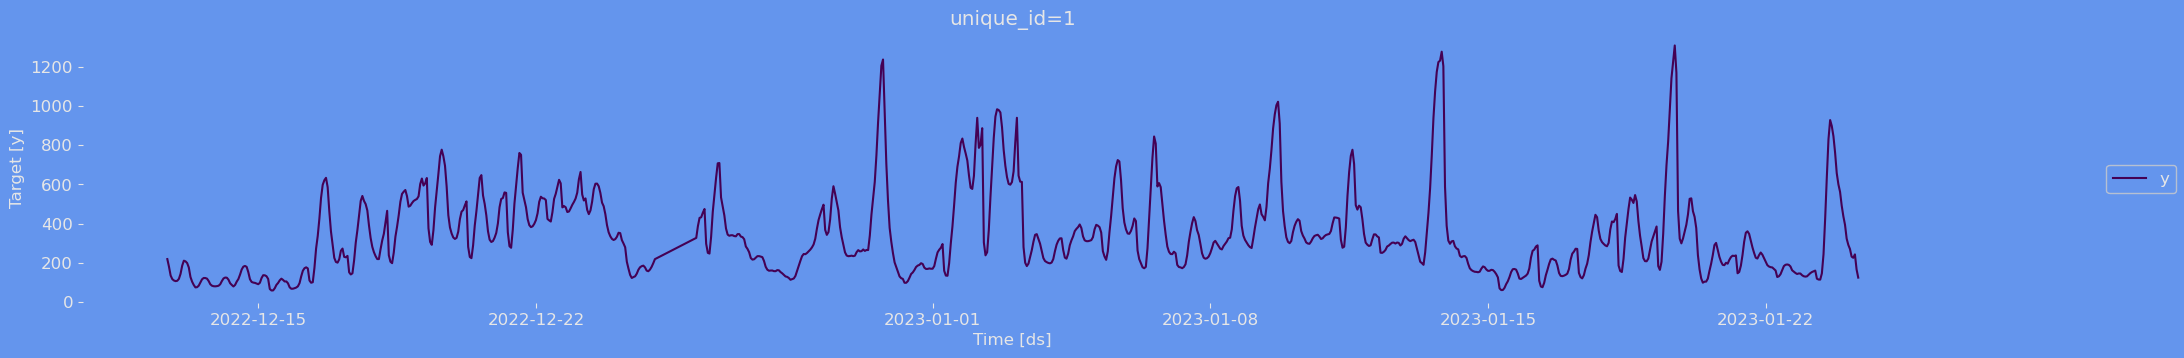

In [9]:
plot_series(df, max_insample_length=1000)

### **Distribution of Dataset**

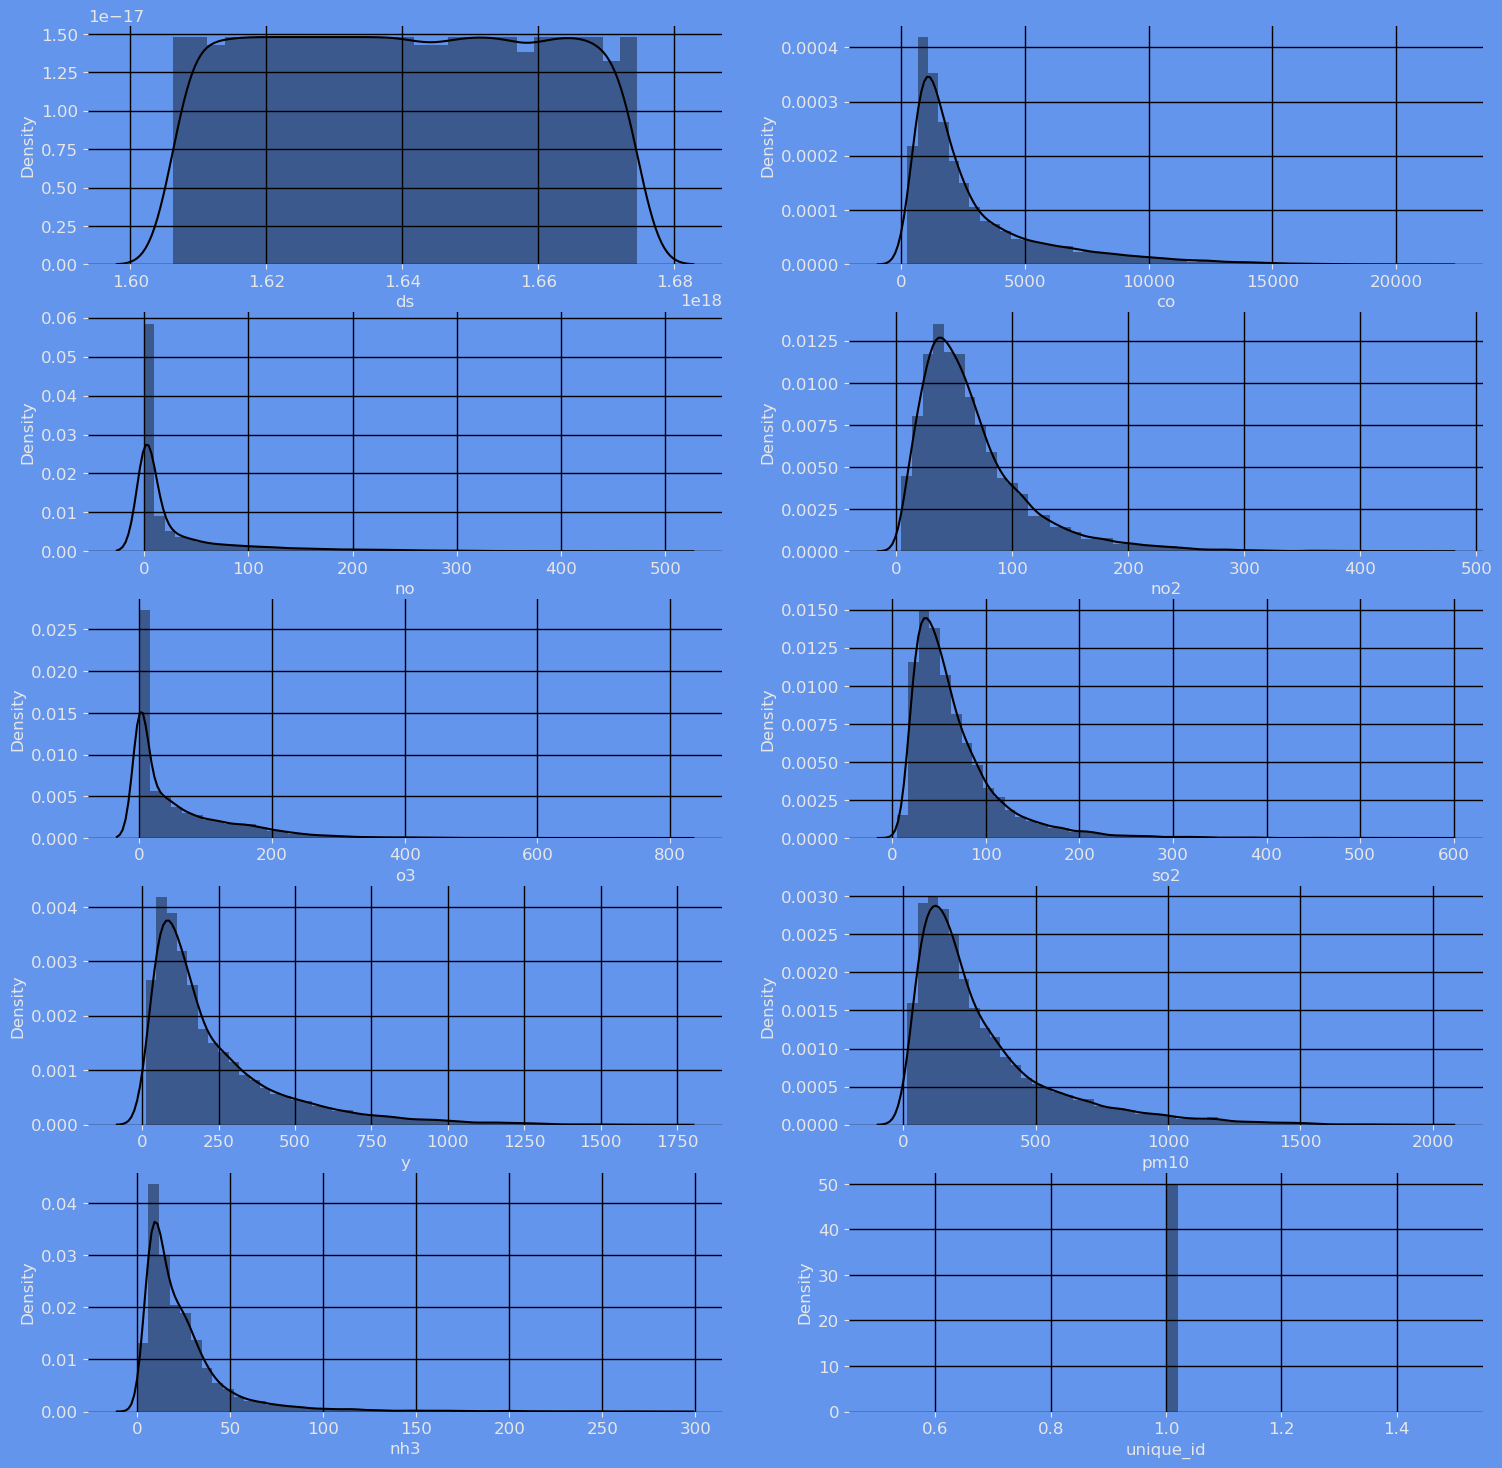

In [10]:
plot=1
plt.figure(figsize=(18,18))
for i in df.columns:
    plt.subplot(5,2,plot)
    sns.distplot(df[i])
    plot = plot+1

plt.show()

### **Working with the Date column**

In [11]:
df['Date'] = df['ds'].dt.date
df['Year'] = df['ds'].dt.year
df['Month'] = df['ds'].dt.month
df['Day'] = df['ds'].dt.day
df['Weekday'] = df['ds'].dt.day_name()
df['hour'] = df['ds'].dt.hour
df.head()

,ds,co,no,no2,o3,so2,y,pm10,nh3,unique_id,Date,Year,Month,Day,Weekday,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,1,2020-11-25,2020,11,25,Wednesday,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,1,2020-11-25,2020,11,25,Wednesday,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,1,2020-11-25,2020,11,25,Wednesday,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,1,2020-11-25,2020,11,25,Wednesday,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,1,2020-11-25,2020,11,25,Wednesday,5


In [12]:
# Adding Season column - Summer,Autumn,Winter,Spring
def season_creation(x):
    if x in [2,3,4]:
        season = "Spring"
    elif x in [5,6]:
        season = "Summer"
    elif x in [7,8]:
        season = "Monsoon"
    elif x in [9,10]:
        season = "Autumn"
    elif x in[11,12,1]:
        season = "Winter"
    return season

In [13]:
df["Season"] = df["Month"].apply(season_creation)
df.head()

,ds,co,no,no2,o3,so2,y,pm10,nh3,unique_id,Date,Year,Month,Day,Weekday,hour,Season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,1,2020-11-25,2020,11,25,Wednesday,1,Winter
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,1,2020-11-25,2020,11,25,Wednesday,2,Winter
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,1,2020-11-25,2020,11,25,Wednesday,3,Winter
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,1,2020-11-25,2020,11,25,Wednesday,4,Winter
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,1,2020-11-25,2020,11,25,Wednesday,5,Winter


### **Visualizing the Particulate Matter 2.5 on different weekdays in different season**

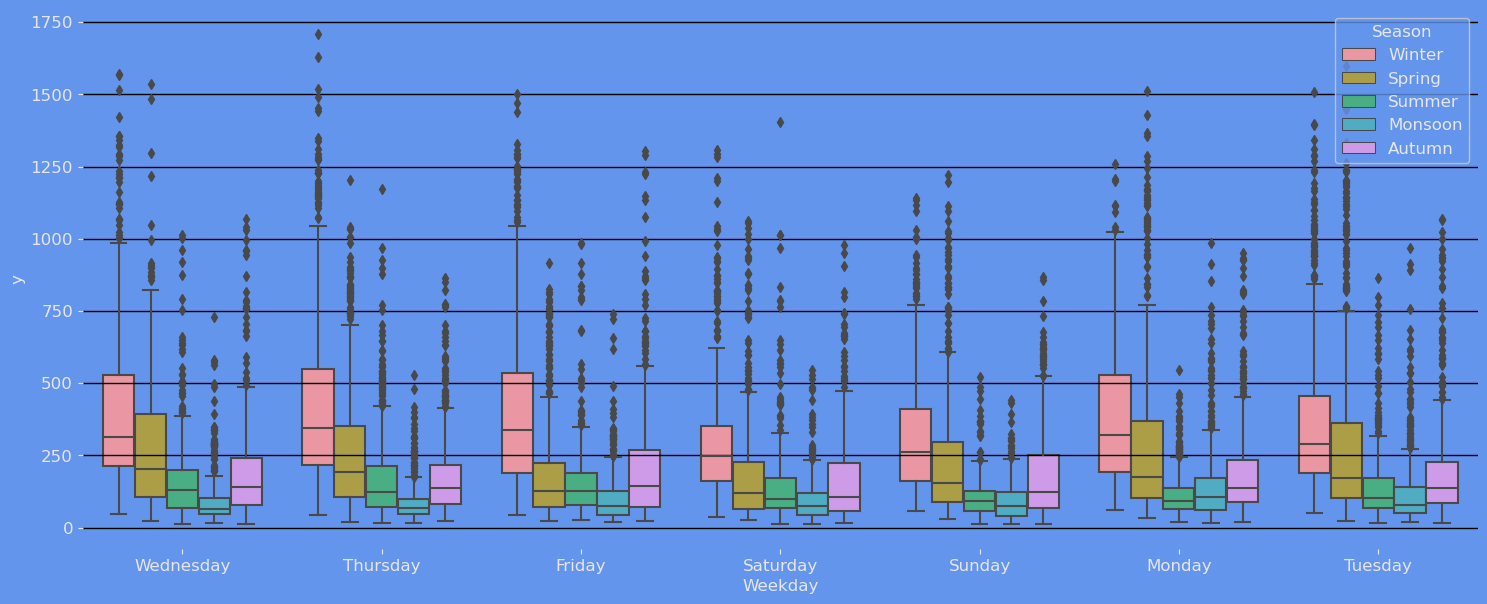

In [14]:
plt.figure(figsize = (18,7))
sns.boxplot(x = df['Weekday'], y = df['y'], hue = df['Season'])
plt.show()

## Observations:
* Winter and Spring have the highest PM2.5 which is quite expected.
* Monsoon season have the least PM2.5
* Weekends have less PM2.5

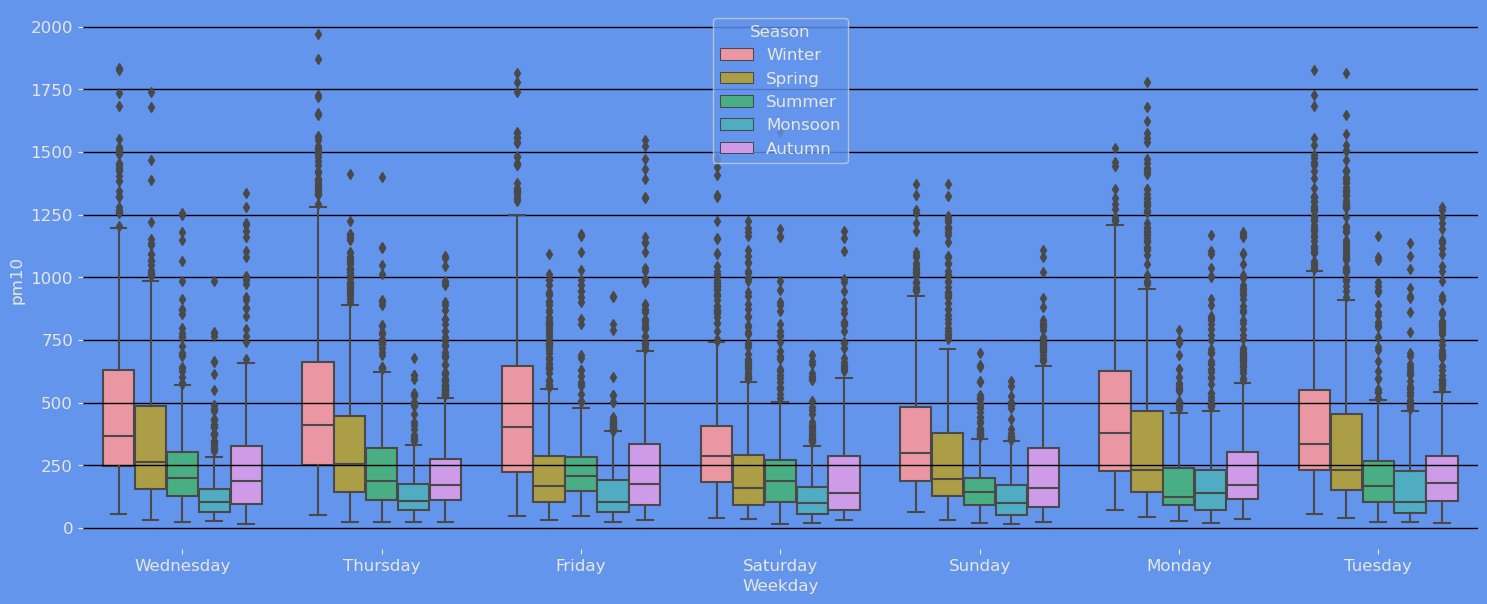

In [15]:
# Visualizing the Particulate Matter 10 on different weekdays in different season
plt.figure(figsize = (18,7))
sns.boxplot(x = df['Weekday'], y = df['pm10'], hue = df['Season'])
plt.show()

# **Visualize the monthly distribution of pollutants**

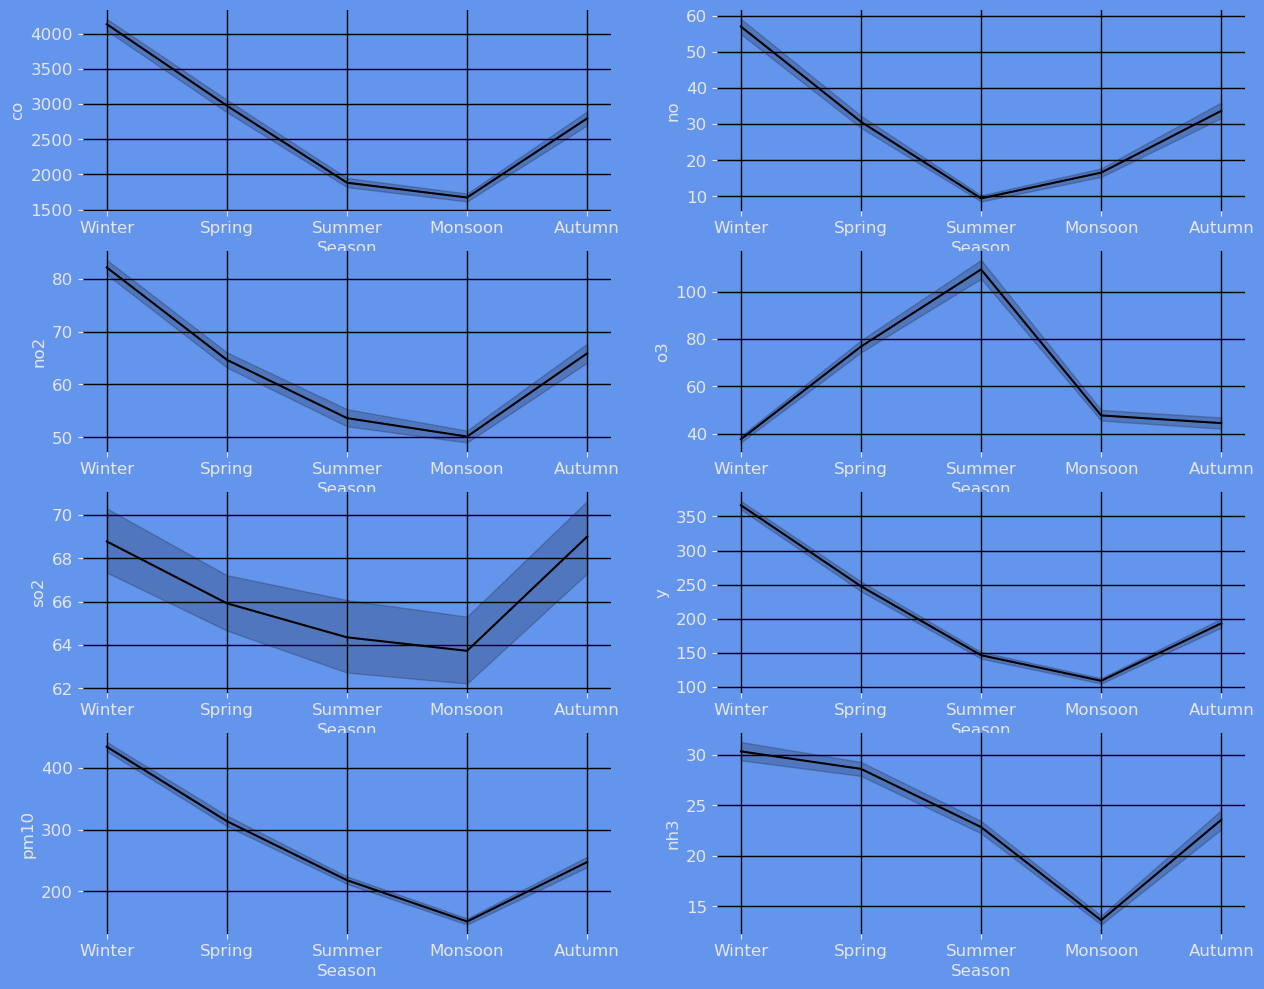

In [16]:
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'y', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(15,12))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x = df['Season'], y = df[i])
    plot = plot+1
plt.show()

## Observations :
* In winters the level of pollutants is maximum
* Ozone is minimum in winters, maximum in summers

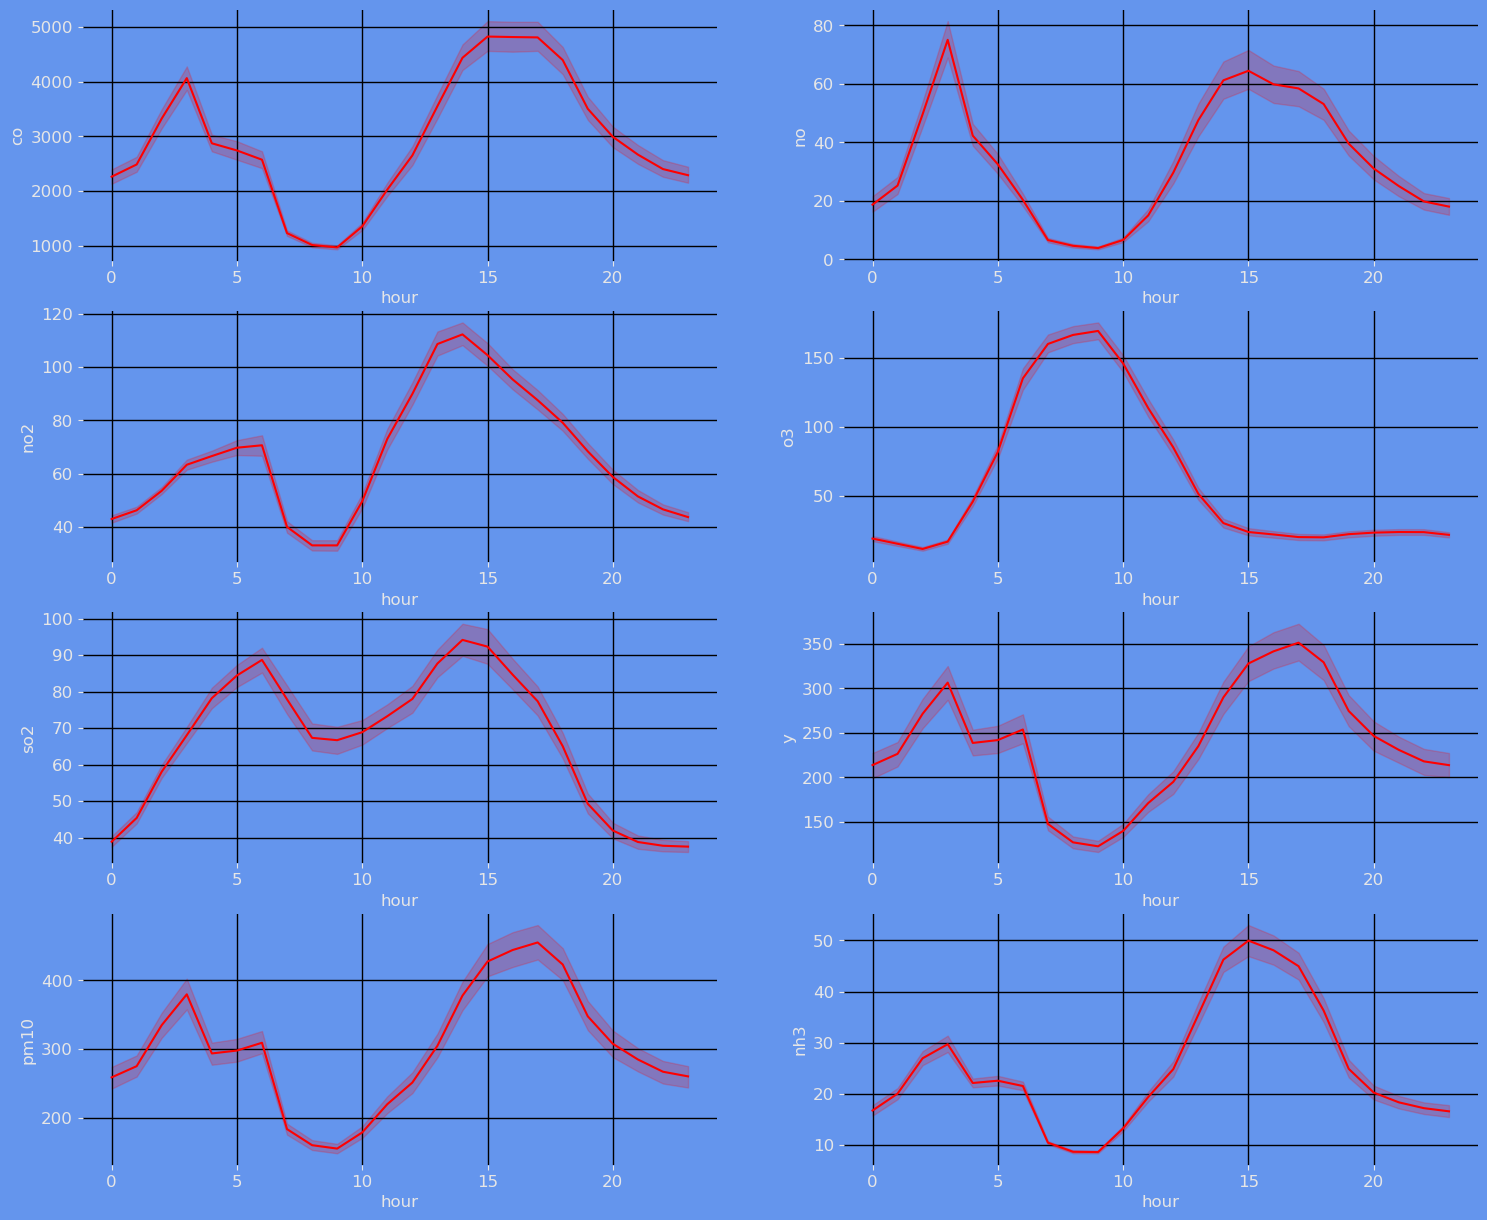

In [17]:
# Hourly Concentration trend of pollutants
list1 = ['co', 'no', 'no2', 'o3', 'so2', 'y', 'pm10', 'nh3']
plot = 1
plt.figure(figsize =(18,15))
for i in list1:
    plt.subplot(4,2,plot)
    sns.lineplot(x='hour', y = i, data = df, color = 'r')
    plot = plot+1
plt.show()

## Observation :
* Evening hours are the peak time for the concentration of pollutants
* Concentration of pollutants is lowest in the morning except SO2

### **Decomposition Component - Trend & Seasonality**

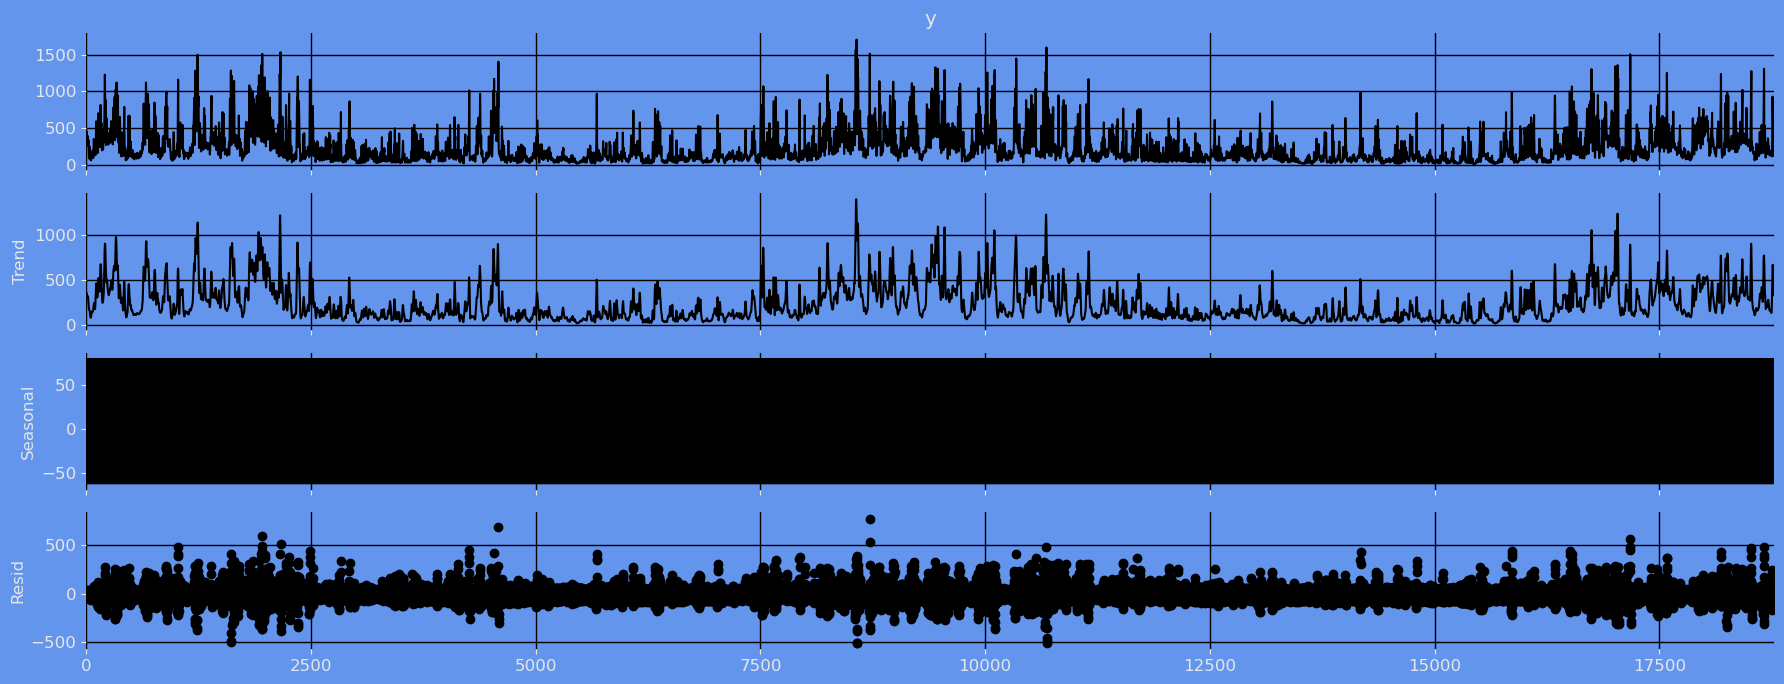

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "additive", period=12)
a.plot();

## **Autocorrelation plots**

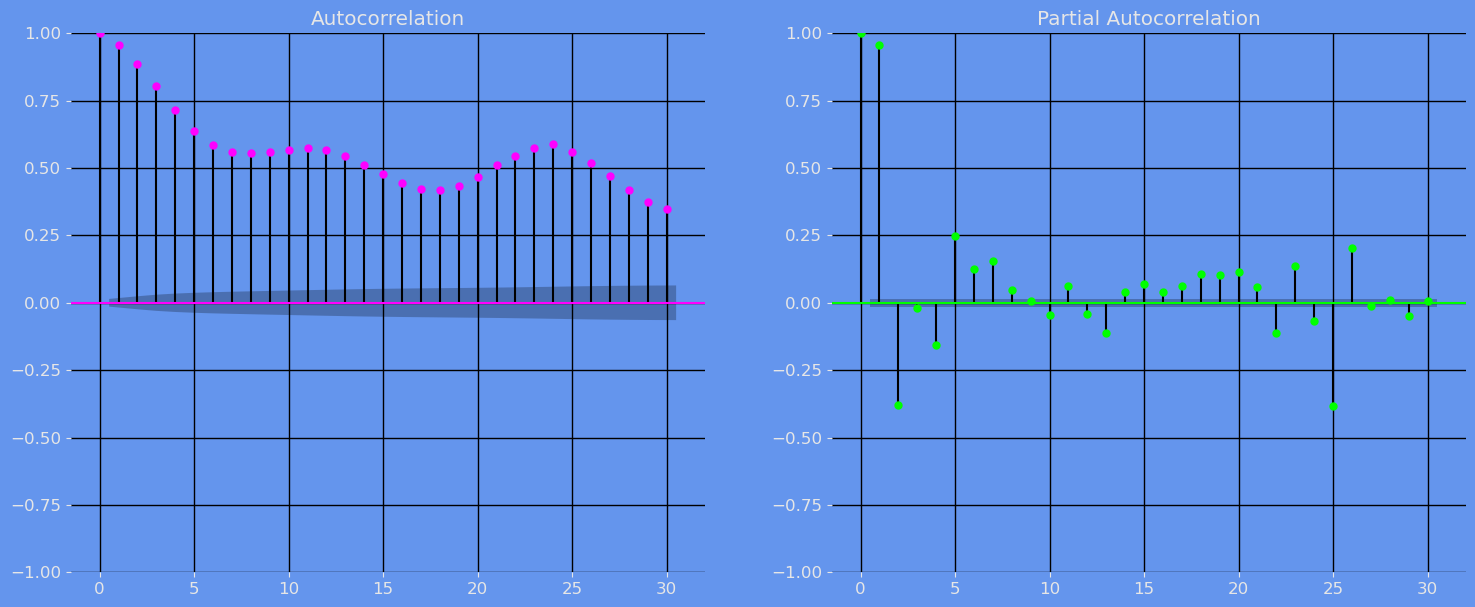

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 120 hours.

In [20]:
data=df[["ds","y","unique_id"]]

In [21]:
train = data[data.ds<='2023-01-19 08:00:00'] 
test=data[(data['ds'] > '2023-01-19 08:00:00')]

train.shape, test.shape

((18656, 3), (120, 3))

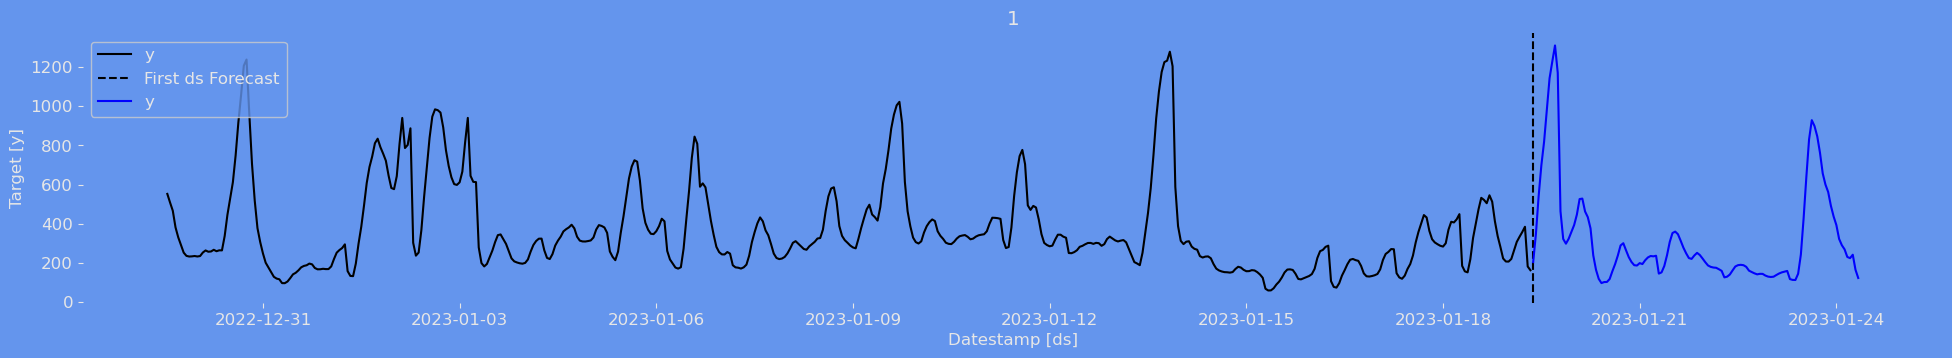

In [22]:
StatsForecast.plot(train, test, max_insample_length=500)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `AutoCES, SeasonalExponentialSmoothingOptimized`, and `Holt Winter` model, using the `SeasonalExponentialSmoothingOptimized, AutoCES, HoltWinters` function. This model will help us forecast user demand in the next 120 hours.

In [2]:
from statsforecast import StatsForecast
from statsforecast.models import AutoCES, SeasonalNaive, SeasonalExponentialSmoothingOptimized, HoltWinters

In [24]:
season_length = 24 # Hourly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [
          AutoCES(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          SeasonalExponentialSmoothingOptimized(season_length=season_length),
          HoltWinters(season_length=season_length, error_type='A', alias='Hws_add'),
          ]

In [25]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='H', 
    n_jobs=-1)

## **Fit the Model**

In [26]:
sf.fit()

StatsForecast(models=[CES,SeasonalNaive,SeasESOpt,Hws_add])

## **Predict Method**
We will use the predict method to forecast the last 120 hours for the Air Quality Prediction. This method only has one parameter, the forecast horizon.

In [27]:
Y_hat = sf.predict(horizon)
Y_hat

,ds,CES,SeasonalNaive,SeasESOpt,Hws_add
unique_id,,,,,
1,2023-01-19 09:00:00,133.621811,152.580002,134.243240,177.323914
1,2023-01-19 10:00:00,169.633453,219.550003,176.491623,213.898300
1,2023-01-19 11:00:00,229.415939,328.290009,239.646118,275.062592
1,2023-01-19 12:00:00,270.588806,402.170013,288.563568,319.911316
1,2023-01-19 13:00:00,316.062225,474.239990,345.899811,371.938446
...,...,...,...,...,...
1,2023-01-24 04:00:00,248.839386,333.739990,316.961884,322.905701
1,2023-01-24 05:00:00,258.352386,357.940002,327.970306,325.497467
1,2023-01-24 06:00:00,267.496460,385.109985,335.517059,326.929413


## **Forecasting Plot**

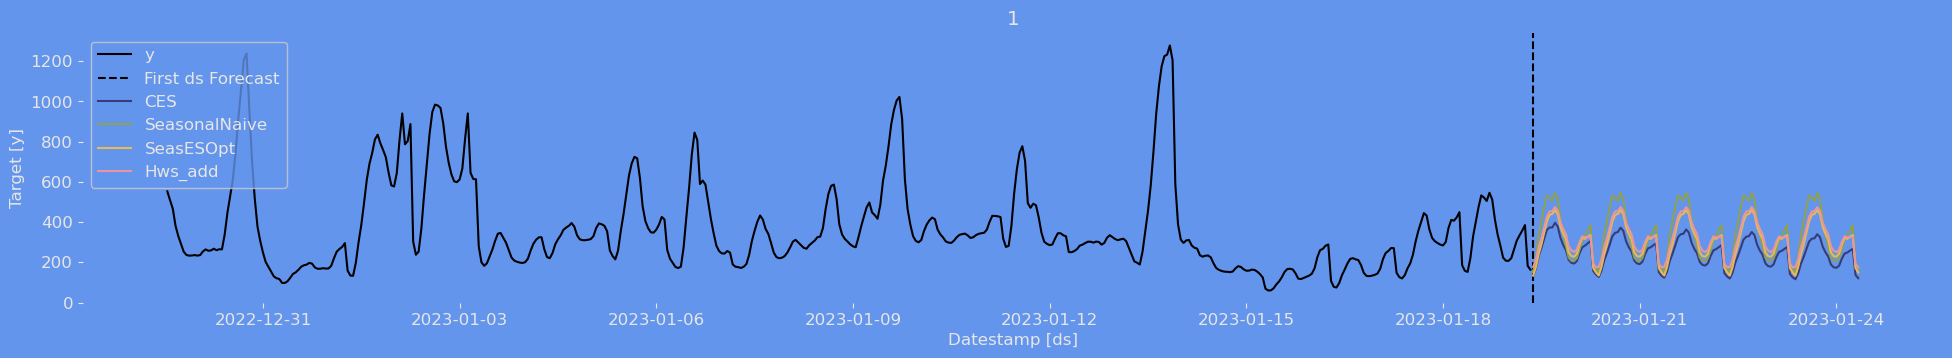

In [28]:
sf.plot(train, Y_hat, max_insample_length=500)

<a id="6"></a>
# **Evaluate the model**

In [29]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [30]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [31]:
print(evaluate_performace(train, test,Y_hat.reset_index() , models=["CES", "SeasESOpt", "Hws_add",  "SeasonalNaive"])
)	

                   mase         mae       mape        rmse      smape
CES            1.193708  149.779210  41.594937  239.487400  42.101475
SeasESOpt      1.295629  162.567534  55.805445  228.350468  46.219107
Hws_add        1.336086  167.643889  61.632337  226.554106  48.177182
SeasonalNaive  1.357732  170.359832  65.269217  226.005009  47.892436


<a id="11"></a>
# **Conclusion**

The analysis presents the results of different models used to predict air quality. Evaluation measures are provided for each model, such as MASE, MAE, MAPE, RMSE, and SMAPE.

In the results presented, it is observed that the CES model has the lowest MASE value, indicating that its predictions are more accurate compared to a naive reference model that simply predicts the previous value. The CES model also has the lowest value of MAE, which represents the mean absolute error of the predictions, indicating that the predictions are closer to the actual values on average.

The SeasESOpt model shows slightly worse results compared to the CES model, with higher values in all evaluation measures. This suggests that the SeasESOpt model underperforms in terms of prediction accuracy compared to the CES model.

The Hws_add model also shows inferior results compared to the CES model, with higher values in all evaluation measures. This indicates that the Hws_add model has less accurate performance in predicting air quality compared to the CES model.

The SeasonalNaive model shows the lowest results in all evaluation measures, indicating that this model has the worst performance in predicting air quality compared to the other evaluated models.

In summary, the CES model shows the best performance in terms of air quality prediction accuracy, followed by the SeasESOpt model and the Hws_add model. The SeasonalNaive model shows the worst performance compared to the other evaluated models. However, it is important to note that these results are specific to the air quality data and context, and could vary in different scenarios or with different data sets. In addition, it is necessary to consider other relevant factors and variables for accurate prediction of air quality, such as meteorological conditions and geographic location.

<a id="12"></a>
# **References**

1. [Modelo CES](https://nixtla.github.io/statsforecast/docs/models/autoces.html)
2. [Model Holt Winter](https://nixtla.github.io/statsforecast/docs/models/holtwinters.html)
3. [Model Seasonal Exponential Smoothing Optimized](https://nixtla.github.io/statsforecast/docs/models/seasonalexponentialsmoothingoptimized.html)
4. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)